In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset=pd.read_csv(r'C:\Users\GANESH\Task-1 Data Science\netflix.csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [4]:
dataset.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4856 entries, 2002-05-23 to 2021-09-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4856 non-null   float64
 1   Low        4856 non-null   float64
 2   Open       4856 non-null   float64
 3   Close      4856 non-null   float64
 4   Volume     4856 non-null   float64
 5   Adj Close  4856 non-null   float64
dtypes: float64(6)
memory usage: 265.6 KB


<AxesSubplot:xlabel='Date'>

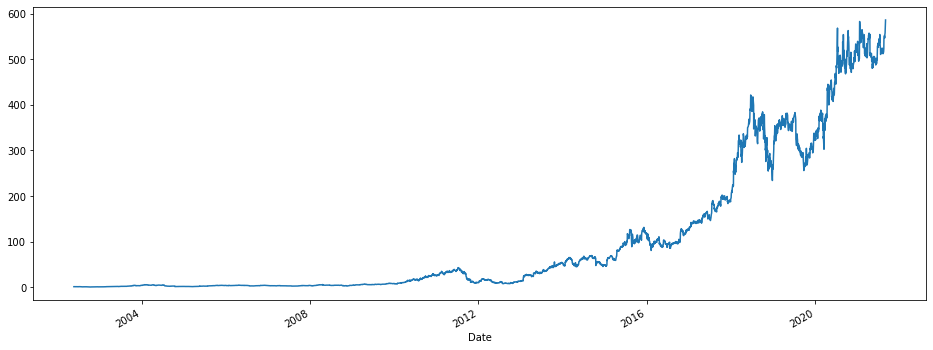

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-24,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-28,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-29,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-30,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-03,1.171429,1.115000,1.145000,1.134796,21576000.0,1.134796
2002-06-04,1.156735,1.110000,1.142041,1.123571,7049600.0,1.123571
2002-06-05,1.147347,1.097143,1.127245,1.114592,5682000.0,1.114592


<AxesSubplot:xlabel='Date'>

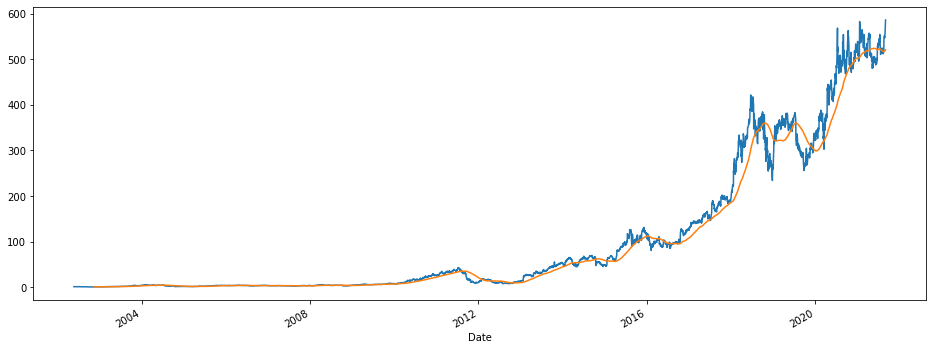

In [8]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=120).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

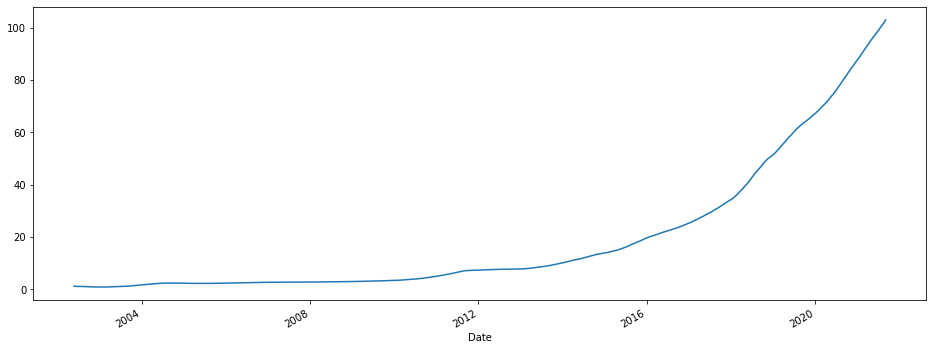

In [9]:
#optimal specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [10]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [11]:
#Data cleaning
dataset.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [12]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range =(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [13]:
# Creating a data structure with 60 timestamps and 1 output
X_train=[]
y_train=[]
for i in range(60,4856):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

#Reshaping
X_train =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [14]:
# Part 2 - Building the RNN
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [15]:
#initialising the RNN
regressor=Sequential()

In [16]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

In [ ]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
150/150 [==============================] - 14s 65ms/step - loss: 0.0051
Epoch 2/100
150/150 [==============================] - 10s 68ms/step - loss: 0.0022
Epoch 3/100
150/150 [==============================] - 9s 59ms/step - loss: 0.0016
Epoch 4/100
150/150 [==============================] - 9s 58ms/step - loss: 0.0013
Epoch 5/100
150/150 [==============================] - 9s 59ms/step - loss: 0.0013
Epoch 6/100
150/150 [==============================] - 10s 66ms/step - loss: 0.0013
Epoch 7/100
150/150 [==============================] - 10s 67ms/step - loss: 0.0011
Epoch 8/100
150/150 [==============================] - 9s 58ms/step - loss: 0.0011
Epoch 9/100
150/150 [==============================] - 10s 63ms/step - loss: 0.0010
Epoch 10/100
150/150 [==============================] - 9s 63ms/step - loss: 0.0011
Epoch 11/100
150/150 [==============================] - 10s 65ms/step - loss: 0.0012
Epoch 12/100
150/150 [==============================] - 10s 69ms/step - loss: 0

In [ ]:
#Part 3-Making the predictions and visualizing the result
#getting the real stock price of 2021
dataset_test=pd.read_csv(r'C:\Users\GANESH\Task-1 Data Science\netflix.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
dataset_test.head()

In [ ]:
dataset_test.info()

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

In [ ]:
#Getting the predicted stock price of 2021
dataset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,4857):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

In [ ]:
#Visualising the results
plot.plot(real_stock_price,color='red',label='Real Netflix Stock Price')
plot.plot(predicted_stock_price,color='blue',label='Predictor Netflix Stock Price')
plot.title('Netflix Stock Price Prediction')
plot.xlabel('Time')
plot.ylabel('Netflix Stock Price')
plot.legend()
plot.show()